In [14]:
from sportsipy.mlb.teams import Teams
from scipy.stats import pearsonr
import statistics
import pandas as pd
from matplotlib import pyplot as plt

In [1]:
print('Correlation(WinRatio,GoalsForRatio)\n')

maxCorr= -1.1
minCorr= 1.1
minYear = 2021
maxYear = 2021
corrList = []
for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
                    G = team.games
                    GF = int(G*team.runs)
                    GA = int(G*team.runs_against)
                    statd[i] = {'Team' : team.name,
                    'W' : team.wins,
                    'L' : team.losses,
                    'G' : G,
                    'WinPct' : round(100*team.wins/G,3),
                    'GF' : GF,
                    'GA' : GA,
                    'GD' : GF-GA,
                    'GfrPct' : round(100*GF/(GF+GA),3),
                    'GD_per' : round((GF-GA)/G,2)}
                    
    df = pd.DataFrame(statd)
    df = df.transpose()

    corr, _ = pearsonr(df['GfrPct'].tolist(), df['WinPct'].tolist())
    corrList.append(corr)
    
    if maxCorr < minCorr:
        minCorr = corr
        maxCorr = corr
        minYear = year
        maxYear = year
        print('%s: %s (new min) (new max)' % (year,round(corr,3)))
    elif corr < minCorr:
        minCorr= corr
        minYear = year
        print('%s: %s (new min)' % (year,round(corr,3)))
    elif corr > maxCorr:
        maxCorr= corr
        maxYear = year
        print('%s: %s (new max)' % (year,round(corr,3)))
    else: 
        print('%s: %s' % (year,round(corr,3)))

print('MIN:%s (%s)' % (minYear,round(minCorr,3)))
print('MAX:%s (%s)' % (maxYear,round(maxCorr,3)))
print('AVG:%s' % (round(sum(corrList)/len(corrList),3)))

Correlation(WinRatio,GoalsForRatio)

1970: 0.92 (new min) (new max)
1971: 0.96 (new max)
1972: 0.904 (new min)
1973: 0.933
1974: 0.932
1975: 0.932
1976: 0.959
1977: 0.957
1978: 0.924
1979: 0.958
1980: 0.92
1981: 0.887 (new min)
1982: 0.939
1983: 0.935
1984: 0.828 (new min)
1985: 0.951
1986: 0.906
1987: 0.928
1988: 0.969 (new max)
1989: 0.938
1990: 0.909
1991: 0.959
1992: 0.924
1993: 0.928
1994: 0.918
1995: 0.899
1996: 0.943
1997: 0.896
1998: 0.961
1999: 0.96
2000: 0.932
2001: 0.953
2002: 0.96
2003: 0.953
2004: 0.946
2005: 0.901
2006: 0.912
2007: 0.901
2008: 0.926
2009: 0.912
2010: 0.976 (new max)
2011: 0.936
2012: 0.947
2013: 0.951
2014: 0.897
2015: 0.89
2016: 0.909
2017: 0.949
2018: 0.948
2019: 0.974
2020: 0.927
MIN:1984 (0.828)
MAX:2010 (0.976)
AVG:0.931


In [11]:
year=2010
teams = list(Teams(year))
statd = {}
    
for i,team in enumerate(teams[0:len(teams)]):
                    G = team.games
                    GF = int(G*team.runs)
                    GA = int(G*team.runs_against)
                    statd[i] = {'Team' : team.name,
                    'W' : team.wins,
                    'L' : team.losses,
                    'G' : G,
                    'WinPct' : round(100*team.wins/G,3),
                    'GF' : GF,
                    'GA' : GA,
                    'GD' : GF-GA,
                    'GfrPct' : round(100*GF/(GF+GA),3),
                    'GD_per' : round((GF-GA)/G,2)}
                    
df = pd.DataFrame(statd)
df = df.transpose()

x = list(df['WinPct'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Iwin'] =  index

x = list(df['GfrPct'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Igfp'] =  index

df['Delta'] = df['Igfp']-df['Iwin']
x = list(df['Delta'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Idel'] =  index

df = df[['Team','W','L','G','GF','GA','WinPct','GD','GD_per','GfrPct','Iwin','Igfp','Delta','Idel']]
df = df.sort_values(['WinPct'],ascending = (False))
df['WINvs50'] = df['WinPct']-50
df_mdian = df.loc[abs(df['GD']) == min(abs((df['GD'])))]
df_mdian = df_mdian[abs(df_mdian['WINvs50']) == min(abs(df_mdian['WINvs50']))].head(1)
df_lucky = df[df['Delta'] == max(df['Delta'])].head(1)
df_nluck = df[df['Delta'] == min(df['Delta'])].head(1)
print('%s Luckiest,Median,Unluckiest Teams:' % year)
df_ext = pd.concat([df_lucky,pd.concat([df_mdian,df_nluck],sort=False)],sort=False)
print(df_ext.to_string(index=False))

2010 Luckiest,Median,Unluckiest Teams:
           Team   W   L    G   GF   GA  WinPct    GD GD_per  GfrPct  Iwin  Igfp  Delta  Idel WINvs50
 Houston Astros  76  86  162  615  729  46.914  -114   -0.7  45.759    21    25      4     0  -3.086
 Detroit Tigers  81  81  162  745  745      50     0      0      50    14    15      1     8       0
  New York Mets  79  83  162  648  648  48.765     0      0      50    19    15     -4    29  -1.235


In [ ]:
'''
1984 Luckiest,Median,Unluckiest Teams: (most anomolous)
               Team   W   L    G   GF   GA  WinPct   GD GD_per  GfrPct  Iwin  Igfp  Delta  Idel WINvs50
      New York Mets  90  72  162  648  680  55.556  -32   -0.2  48.795     3    18     15     0   5.556
    Minnesota Twins  81  81  162  680  680      50    0      0      50    10    11      1    11       0
 Pittsburgh Pirates  75  87  162  615  567  46.296   48    0.3   52.03    18     4    -14    25  -3.704
    
2010 Luckiest,Median,Unluckiest Teams: (most predictable)
           Team   W   L    G   GF   GA  WinPct    GD GD_per  GfrPct  Iwin  Igfp  Delta  Idel WINvs50
 Houston Astros  76  86  162  615  729  46.914  -114   -0.7  45.759    21    25      4     0  -3.086
 Detroit Tigers  81  81  162  745  745      50     0      0      50    14    15      1     8       0
  New York Mets  79  83  162  648  648  48.765     0      0      50    19    15     -4    29  -1.235
'''

In [6]:
year=2010
teams = list(Teams(year))
statd = {}
    
for i,team in enumerate(teams[0:len(teams)]):
                    G = team.games
                    GF = int(G*team.runs)
                    GA = int(G*team.runs_against)
                    statd[i] = {'Team' : team.name,
                    'W' : team.wins,
                    'L' : team.losses,
                    'G' : G,
                    'WinPct' : round(100*team.wins/G,3),
                    'GF' : GF,
                    'GA' : GA,
                    'GD' : GF-GA,
                    'GfrPct' : round(100*GF/(GF+GA),3),
                    'GD_per' : round((GF-GA)/G,2)}
                    
df = pd.DataFrame(statd)
df = df.transpose()

x = list(df['WinPct'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Iwin'] =  index

x = list(df['GfrPct'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Igfp'] =  index

df['Delta'] = df['Igfp']-df['Iwin']
x = list(df['Delta'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Idel'] =  index

df = df[['Team','W','L','G','GF','GA','WinPct','GD_per','GfrPct','Iwin','Igfp','Delta','Idel']]
df = df.sort_values(['WinPct'],ascending = (False))
print('%s MLB Season - Ranked by %% Games Won [>LosPct]' % year)
with pd.option_context('display.max_rows',6):
    display(df)

df = df.sort_values('GfrPct',ascending=False)
print('\n%s MLB Season - Ranked by %% Points Scored [<GfrPct]' % year)
with pd.option_context('display.max_rows',6):
    display(df)

df = df.sort_values('Idel',ascending=True)
print('\n%s MLB Season - Ranked by Luck [<Delta (Igfp-Iwin)]' % year)
with pd.option_context('display.max_rows',6):
    display(df)

2010 NFL Season - Ranked by % Games Won [>LosPct]


,Team,W,L,G,GF,GA,WinPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
0,Philadelphia Phillies,97,65,162,777,648,59.877,0.8,54.526,0,2,2,2
1,Tampa Bay Rays,96,66,162,810,648,59.259,1,55.556,1,0,-1,16
2,New York Yankees,95,67,162,858,696,58.642,1,55.212,2,1,-1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Arizona Diamondbacks,65,97,162,712,842,40.123,-0.8,45.817,27,24,-3,27
28,Seattle Mariners,61,101,162,518,696,37.654,-1.1,42.669,28,28,0,13
29,Pittsburgh Pirates,57,105,162,583,858,35.185,-1.7,40.458,29,29,0,13



2010 NFL Season - Ranked by % Points Scored [<GfrPct]


,Team,W,L,G,GF,GA,WinPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
1,Tampa Bay Rays,96,66,162,810,648,59.259,1,55.556,1,0,-1,16
2,New York Yankees,95,67,162,858,696,58.642,1,55.212,2,1,-1,16
0,Philadelphia Phillies,97,65,162,777,648,59.877,0.8,54.526,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,Baltimore Orioles,66,96,162,615,777,40.741,-1,44.181,26,27,1,8
28,Seattle Mariners,61,101,162,518,696,37.654,-1.1,42.669,28,28,0,13
29,Pittsburgh Pirates,57,105,162,583,858,35.185,-1.7,40.458,29,29,0,13



2010 NFL Season - Ranked by Luck [<Delta (Igfp-Iwin)]


,Team,W,L,G,GF,GA,WinPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
21,Houston Astros,76,86,162,615,729,46.914,-0.7,45.759,21,25,4,0
18,Los Angeles Dodgers,80,82,162,664,696,49.383,-0.2,48.824,16,19,3,1
12,Toronto Blue Jays,85,77,162,761,729,52.469,0.2,51.074,12,14,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,Colorado Rockies,83,79,162,777,712,51.235,0.4,52.183,13,10,-3,27
27,Arizona Diamondbacks,65,97,162,712,842,40.123,-0.8,45.817,27,24,-3,27
19,New York Mets,79,83,162,648,648,48.765,0,50,19,15,-4,29


In [13]:
minDelta = 0
maxDelta = 0
deltaList = []
for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
        G = team.games
        GF = int(G*team.runs)
        GA = int(G*team.runs_against)
        statd[i] = {'Team' : team.name,
                    'WinPct' : round(100*team.wins/G,3),
                    'GfrPct' : round(100*GF/(GF+GA),3)}
        
    df = pd.DataFrame(statd)
    df = df.transpose()

    x = list(df['WinPct'])
    seq = sorted(x,reverse=True)
    index = [seq.index(v) for v in x]
    df['Iwin'] =  index

    x = list(df['GfrPct'])
    seq = sorted(x,reverse=True)
    index = [seq.index(v) for v in x]
    df['Igfp'] =  index

    df['Delta'] = df['Igfp']-df['Iwin']
    x = list(df['Delta'])
    
    locMinDelta = int(min(df['Delta']))
    locMinTeam = df.Team[df['Delta'] == locMinDelta]
    locMinTeam = locMinTeam.to_string(index=False)
    locMaxDelta = int(max(df['Delta']))
    locMaxTeam = df.Team[df['Delta'] == locMaxDelta]
    locMaxTeam = locMaxTeam.to_string(index=False)
    
    if maxDelta == minDelta:
        minDelta = locMinDelta
        maxDelta = locMaxDelta
        minTeam = locMinTeam
        maxTeam = locMaxTeam
        minYear = year
        maxYear = year
        print('%s %s: %s (new minDelta) (new maxDelta)' % (year,locMinTeam,round(minDelta,3)))
    elif locMinDelta < minDelta:
        minDelta= locMinDelta
        minTeam = locMinTeam
        minYear = year
        print('%s %s: %s (new min)' % (year,locMinTeam,round(minDelta,3)))
    elif locMaxDelta > maxDelta:
        maxDelta = locMaxDelta
        maxTeam = locMaxTeam
        maxYear = year
        print('%s %s: %s (new max)' % (year,locMaxTeam,round(maxDelta,3)))
    else: 
        pass
    
    for d in x:
        deltaList.append(d)

deltaList=sorted(deltaList,reverse=False)

1970  Chicago Cubs: -8 (new minDelta) (new maxDelta)
1971  Chicago Cubs: 6 (new max)
1972  Chicago White Sox: 7 (new max)
1973  Detroit Tigers: 9 (new max)
1981  Texas Rangers: -9 (new min)
1984  Pittsburgh Pirates: -14 (new min)
1991  San Diego Padres: 10 (new max)
1994  Pittsburgh Pirates: 11 (new max)
2007  Arizona Diamondbacks: 12 (new max)


median: 0.0
mean: 0.14
mode: 0
pstdev: 3.33
pvariance: 11.1
quartiles: [-2.0, 0.0, 2.0]
deciles: [-4.0, -2.0, -1.0, 0.0, 0.0, 1.0, 1.0, 2.0, 4.0]


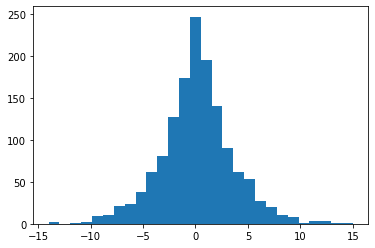

In [15]:
print('median: ' + str(statistics.median(deltaList)))
print('mean: ' + str(round(statistics.mean(deltaList),2)))
print('mode: ' + str(statistics.mode(deltaList)))
print('pstdev: ' + str(round(statistics.pstdev(deltaList),2)))
print('pvariance: ' + str(round(statistics.pvariance(deltaList),2)))

quartiles=[round(q, 1) for q in statistics.quantiles(deltaList, n=4)]
deciles=[round(q, 1) for q in statistics.quantiles(deltaList, n=10)]
print('quartiles: '+ str(quartiles))
print('deciles: '+ str(deciles))

buck = len(set(deltaList))
plt.hist(deltaList, buck)
plt.show()